In [1]:
from prody import *
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename


### Building Covariance Matrix

In [2]:
structure = parsePDB('initial.pdb')
structure_calpha = structure.select('calpha')
ensemble = parseDCD('initial.dcd')
ensemble.setCoords(structure)
ensemble.setAtoms(structure.calpha)
ensemble.superpose()
eda_ensemble = EDA('CaM_low_is Ensemble')
eda_ensemble.buildCovariance( ensemble )
covariance = eda_ensemble.getCovariance()
np.savetxt('covariance.dat', covariance)
eda_ensemble.calcModes()

@> 143 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> DCD file contains 2002 coordinate sets for 143 atoms.
@> DCD file was parsed in 0.00 seconds.
@> 3.43 MB parsed at input rate 859.21 MB/s.
@> 2002 coordinate sets parsed at input rate 501642 frame/s.
@> Superposition completed in 2.85 seconds.
@> Covariance is calculated using 2002 coordinate sets.
@> Covariance matrix calculated in 2.744664s.
@> 20 modes were calculated in 0.02s.


### Mod contribution

In [3]:
eigvals_sum = np.sum(eda_ensemble.getEigvals())
eigvals_contri_list = []
for i in range(10):
     eigvals_contri = (eda_ensemble[i].getEigval()/ np.sum(eda_ensemble.getEigvals()))*100
     eigvals_contri_list.append(eigvals_contri)
np.savetxt('protein_eigvals_contribution.dat',eigvals_contri_list)
writeNMD("protein_pca.nmd", eda_ensemble, structure_calpha)

'protein_pca.nmd'

## Creating Cross-Correlation Matrix, PCA  

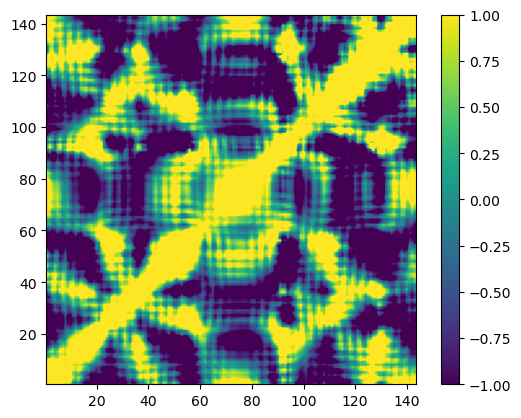

In [4]:
residue_number = len(structure_calpha)
cross_corr = np.zeros((residue_number,residue_number))
for i in range(residue_number):
             for j in range(residue_number):
                 a = (3*(i))
                 b = (3*(i)+1)
                 c = (3*(i)+2)
                 d = (3*(j))
                 e = (3*(j)+1)
                 f = (3*(j)+2)
                 cross_corr[i,j] = covariance[a,d]+covariance[b,e]+covariance[c,f]
arange = np.arange(residue_number)
cross_correlations = np.zeros((arange[-1]+2, arange[-1]+2))
cross_correlations[arange[0]+1:,arange[0]+1:] = cross_corr
np.savetxt('cross_corr.dat', cross_corr)
plt.imshow(cross_correlations,vmin=-1,vmax=1), plt.colorbar()
plt.axis([arange[0]+0.5, arange[-1]+1.5, arange[0]+0.5, arange[-1]+1.5])
savefig('protein_correlation', dpi=300, bbox_inches='tight')